### Consultas y Visualización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector

In [2]:
estadios = mysql.connector.connect(host="localhost", user="root", passwd="julieta2809",database="estadios")

if estadios.is_connected():
    print("Conexión establecida correctamente.")
else:
    print("Problemas con la conexión.")

Conexión establecida correctamente.


In [3]:
cursor = estadios.cursor()

In [4]:
cursor.execute("SELECT confederation, SUM(capacity) FROM estadios_tres_confederaciones GROUP BY confederation ORDER BY SUM(capacity) DESC") 
               
capacidad_por_confedereacion = cursor.fetchall()

for i in capacidad_por_confedereacion:
    print (i)

('UEFA', Decimal('20158727'))
('CONCACAF', Decimal('9001050'))
('CONMEBOL', Decimal('4223002'))


In [5]:
capacidad_df = pd.DataFrame(capacidad_por_confedereacion, columns=[i[0] for i in cursor.description])

capacidad_df



,confederation,SUM(capacity)
0,UEFA,20158727
1,CONCACAF,9001050
2,CONMEBOL,4223002


In [34]:
capacidad_df['SUM(capacity)'] = capacidad_df['SUM(capacity)'].astype(int)
print(capacidad_df['SUM(capacity)'])

0    20158727
1     9001050
2     4223002
Name: SUM(capacity), dtype: int32


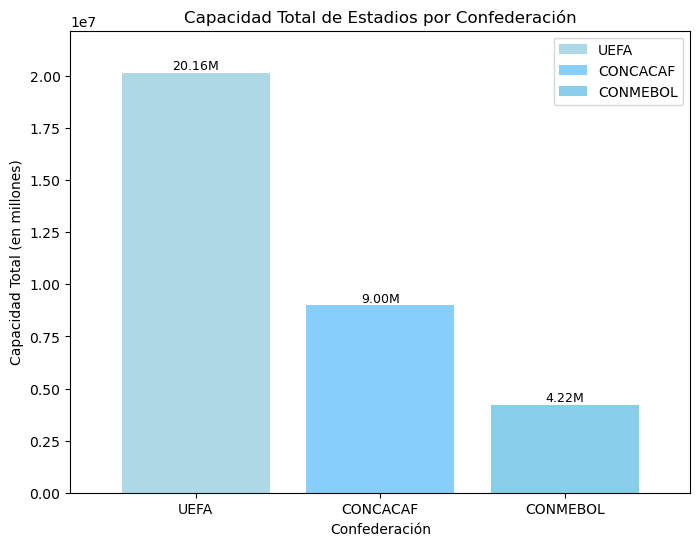

In [37]:
capacidad_df['SUM(capacity)'] = capacidad_df['SUM(capacity)'].astype(int)

plt.figure(figsize=(8, 6))
bars = plt.bar(capacidad_df['confederation'], capacidad_df['SUM(capacity)'], color=['lightblue', 'lightskyblue', 'skyblue'])
plt.xlabel('Confederación')
plt.ylabel('Capacidad Total (en millones)')
plt.title('Capacidad Total de Estadios por Confederación')
plt.margins(0.1)
plt.legend(bars, capacidad_df['confederation'])

for i, valor in enumerate(capacidad_df['SUM(capacity)']):
    plt.text(i, valor, f'{valor/1e6:.2f}M', ha='center', va='bottom', color='black', fontsize=9)

plt.show()

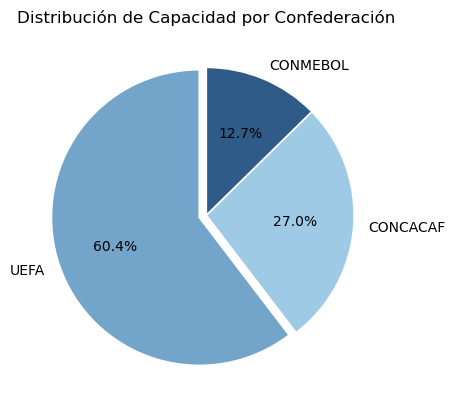

In [93]:
plt.pie(capacidad_df['SUM(capacity)'],labels = capacidad_df['confederation'],
        startangle = 90, autopct = '%1.1f%%', colors=["#73A4CA", "#9FCAE6", "#2E5B88"], 
        wedgeprops = {"linewidth": 1.2, "edgecolor": "white"}, explode = [0.05, 0, 0])

plt.title('Distribución de Capacidad por Confederación');

In [9]:
#!git add Consultas_Visualización.ipynb

In [10]:
#!git commit -m "Creo nuevo archivo."

In [11]:
#!git push